<a href="https://colab.research.google.com/github/Raushan787/Well-Test-Analysis/blob/main/Flow_after_flow_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

Initial shut in bore hole pressure=408.2 psia. Calculate wellbore deliverability equation

In [105]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
#Taking dataset of flow after flow test
Pws=408.2 #psia
df=pd.DataFrame({"Test":["1","2","3","4"],"Pwf(psia)":["403.10","394","378.50","362.6"],"Qg(MSCF/D)":["4288","9265","15552","20177"]})
df

,Test,Pwf(psia),Qg(MSCF/D)
0,1,403.10,4288
1,2,394,9265
2,3,378.50,15552
3,4,362.6,20177


In [107]:
#Removing the unit of data
df=df.rename(columns={"Pwf(psia)":"Pwf","Qg(MSCF/D)":"Qg"})
#Change data type to float
df["Pwf"] = df["Pwf"].astype(float)
df["Qg"] = df["Qg"].astype(float)
df

,Test,Pwf,Qg
0,1,403.1,4288.0
1,2,394.0,9265.0
2,3,378.5,15552.0
3,4,362.6,20177.0


Since pressure is below 2000 psia so,I used the pressure square approximation

#**Empirical Approach**#

**Qg=C*(Pws^2-Pwf^2)^n**

log(Qg) =log(C) + nlog(Pws^2-Pwf^2)

log(Pws^2-Pwf^2)=log(Qg)/n -log(C)/n

In [108]:
#Using term d(P_squ)=Pws^2-Pwf^2
df["d(P_squ)"]=np.zeros(len(df))
df["d(P_squ)"]=Pws**2-df["Pwf"]**2
df

,Test,Pwf,Qg,d(P_squ)
0,1,403.1,4288.0,4137.63
1,2,394.0,9265.0,11391.24
2,3,378.5,15552.0,23364.99
3,4,362.6,20177.0,35148.48


In [109]:
#Assigning input (x=Qg) & output (y=Pws^2-Pwf^2)
x=df[["Qg"]]
y=df["d(P_squ)"]

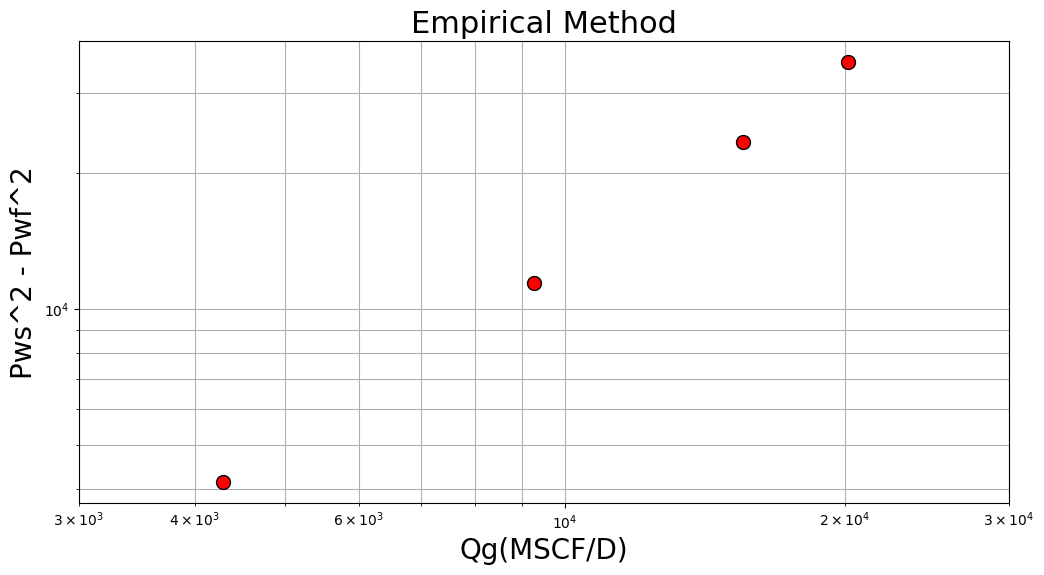

In [110]:
#Scatter plopt of test point
plt.figure(figsize=(12,6))
plt.loglog(x,y,"o",color="black",markerfacecolor="red",markersize=10,lw=3)
plt.title("Empirical Method",fontsize=22)
plt.xlabel("Qg(MSCF/D)",fontsize=20)
plt.ylabel("Pws^2 - Pwf^2",fontsize="20")
plt.xlim(3000,3*10**4)
plt.grid(True,which="both")

# Using linear Regression to find slope and intercept

In [111]:
#Performing linear regression on log log
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(np.log10(x),np.log10(y))

LinearRegression()

In [112]:
#Slope
model.coef_

array([1.3728273])

In [113]:
#Intercept
model.intercept_

np.float64(-1.3772201520183867)

In [114]:
#Predictions
y_pred=model.predict(np.log10(x))

In [115]:
#R-square
model.score(np.log10(x),(y_pred))

1.0

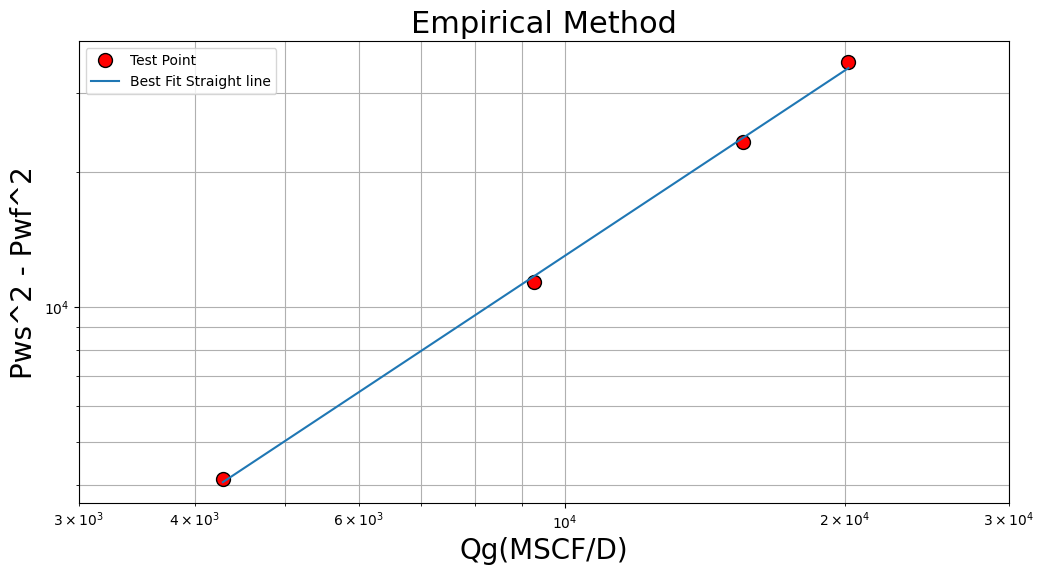

In [116]:
#Plot
plt.figure(figsize=(12,6))
plt.loglog(x,y,"o",color="black",markerfacecolor="red",markersize=10,lw=3,label="Test Point")
plt.loglog(x,10**y_pred,label="Best Fit Straight line")
plt.title("Empirical Method",fontsize=22)
plt.xlabel("Qg(MSCF/D)",fontsize=20)
plt.ylabel("Pws^2 - Pwf^2",fontsize="20")
plt.xlim(3000,3*10**4)
plt.grid(True,which="both")
plt.legend()

In [117]:
#Value of parameter n and C
#n=1/slope
n=1/model.coef_[0]
n=np.round(n,3)
n

np.float64(0.728)

Method 1 to find C using intercept

In [118]:
#intercept=-(logC)/n
#C=10**(-intercept*n)
C=10**(-model.intercept_*n)
C=np.round(C,3)
C

np.float64(10.06)

Method 2 to find C using equation

In [119]:
C=(df["Qg"][0])/(df["d(P_squ)"][0])**n
C

np.float64(9.982965585750952)

From both method C is nearly 10 ( 9.98 &10.06).So assuming c=10

In [123]:
C=10.02

In [124]:
# For AOF calculation Pwf=14.7 psi
Pwf_aof=14.7
AOF=C*(Pws**2-Pwf_aof**2)**n
AOF

np.float64(63370.702949545666)

In [125]:
print("\nEquation of Well Deliverability (Empirical Method):")
print("The deliverability equation is Qg =",C,"*(Pws^2-Pwf^2)^",n)
print("Absolute Open Flow is ",np.round(AOF,3) ,"MSCFD")



Equation of Well Deliverability (Empirical Method):
The deliverability equation is Qg = 10.02 *(Pws^2-Pwf^2)^ 0.728
Absolute Open Flow is  63370.703 MSCFD


#**Theorectical Method**#

(Pws^2-Pwf^2)/Qg =a+bQg

**Slope =b , intercept=a**

In [126]:
df["d(P_squ)/Qg"]=df["d(P_squ)"]/df["Qg"]
df.head()

,Test,Pwf,Qg,d(P_squ),d(P_squ)/Qg
0,1,403.1,4288.0,4137.63,0.964932
1,2,394.0,9265.0,11391.24,1.229492
2,3,378.5,15552.0,23364.99,1.502378
3,4,362.6,20177.0,35148.48,1.742007


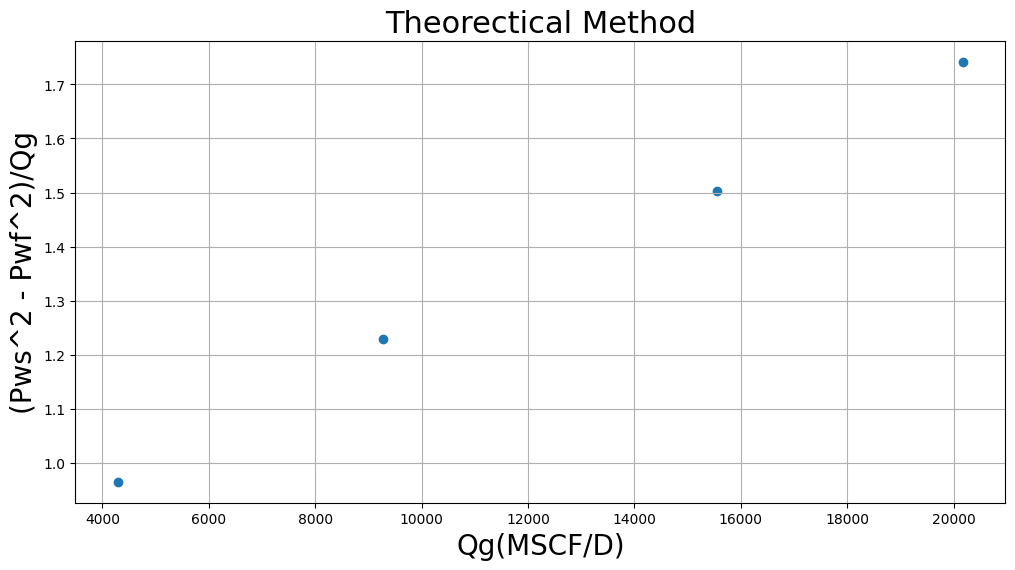

In [135]:
plt.figure(figsize=(12,6))
plt.scatter(df["Qg"],df["d(P_squ)/Qg"])
plt.title("Theorectical Method",fontsize=22)
plt.xlabel("Qg(MSCF/D)",fontsize=20)
plt.ylabel("(Pws^2 - Pwf^2)/Qg",fontsize="20")
plt.grid()


In [136]:
model.fit(df[["Qg"]],df["d(P_squ)/Qg"])

LinearRegression()

In [137]:
y_pred=model.predict(df[["Qg"]])

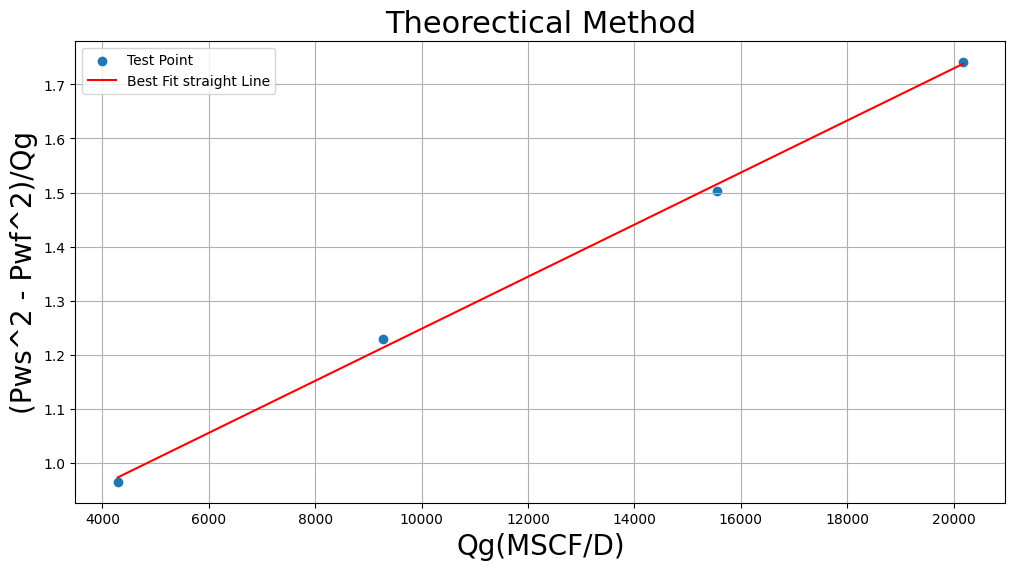

In [138]:
plt.figure(figsize=(12,6))
plt.scatter(df["Qg"],df["d(P_squ)/Qg"],label="Test Point")
plt.plot(df["Qg"],y_pred,color="red",label="Best Fit straight Line")
plt.title("Theorectical Method",fontsize=22)
plt.xlabel("Qg(MSCF/D)",fontsize=20)
plt.ylabel("(Pws^2 - Pwf^2)/Qg",fontsize="20")
plt.legend()
plt.grid()

In [139]:
b=model.coef_[0]
a=model.intercept_
a,b

(np.float64(0.7662666872620125), np.float64(4.816653065470298e-05))

Equation of Well Deliverability

0.766Qg + 4.817Qg^2 =Pws^2-Pwf^2

In [140]:
# Get the parameters a and b
b = model.coef_[0]
a = model.intercept_

print(f"Parameter a (intercept): {a}")
print(f"Parameter b (slope): {b}")

# Equation of Well Deliverability
# (Pws^2-Pwf^2)/Qg = a + b*Qg
# Pws^2-Pwf^2 = a*Qg + b*Qg^2
# For AOF calculation Pwf=14.7 psi
Pwf_aof=14.7

# Calculate the term Pws^2 - Pwf_aof^2
delta_P_squ_aof = Pws**2 - Pwf_aof**2




Parameter a (intercept): 0.7662666872620125
Parameter b (slope): 4.816653065470298e-05


In [141]:
# Solve the quadratic equation b*AOF^2 + a*AOF - delta_P_squ_aof = 0 for AOF
# Use the quadratic formula: AOF = [-a + sqrt(a^2 + 4*b*delta_P_squ_aof)] / (2*b)
# Use precise values of a and b from the model
discriminant = a**2 + 4 * b * delta_P_squ_aof

In [142]:
# Check if discriminant is negative (though it should be positive with these values)
if discriminant < 0:
    print("Warning: Discriminant is negative, no real solution for AOF.")
    AOF_theoretical = np.nan # Assign NaN or handle as appropriate
else:
    AOF_theoretical = (-a + np.sqrt(discriminant)) / (2 * b)

print("\nEquation of Well Deliverability (Theoretical Method):")
print(f"{a:.3f}*Qg + {b:.3f}*Qg^2 = Pws^2 - Pwf^2")
print(f"Absolute Open Flow (Theoretical Method): {np.round(AOF_theoretical, 3)} MSCFD")


Equation of Well Deliverability (Theoretical Method):
0.766*Qg + 0.000*Qg^2 = Pws^2 - Pwf^2
Absolute Open Flow (Theoretical Method): 51359.935 MSCFD
